# Bird Migration

First of all import all the important libraries.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

Now import the dataset.

In [30]:
birddata = pd.read_csv('bird_tracking.csv')
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [31]:
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [35]:
birddata.describe()

,Unnamed: 0,altitude,device_info_serial,direction,latitude,longitude,speed_2d
count,61920.000000,61920.000000,61920.000000,61477.000000,61920.000000,61920.000000,61477.000000
mean,30959.500000,52.313275,849.328505,-4.610841,30.227762,-8.953367,2.558987
std,17874.908671,136.435498,12.835870,102.786009,14.809813,8.478471,3.576039
min,0.000000,-1010.000000,833.000000,-179.997929,12.354424,-17.626145,0.000000
25%,15479.750000,2.000000,833.000000,-89.679759,15.393138,-16.761302,0.410000
50%,30959.500000,14.000000,851.000000,-10.983115,30.424481,-9.662089,1.209049
75%,46439.250000,84.000000,864.000000,81.964778,49.999572,2.603591,3.059444
max,61919.000000,6965.000000,864.000000,180.000000,51.518452,4.857561,63.488066


In [20]:
bird_names = pd.unique(birddata.bird_name)
print(bird_names)

['Eric' 'Nico' 'Sanne']


Plot for tajactories of all birds in bird data

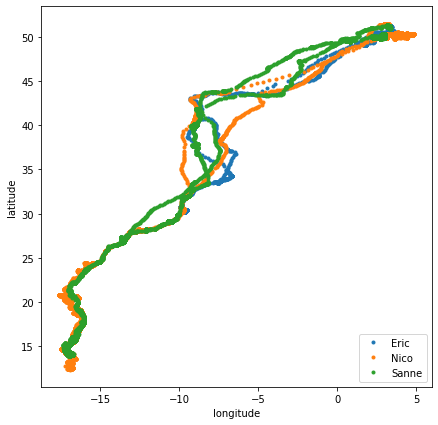

In [21]:
plt.figure(figsize= (7,7))
for name in bird_names:
    idx = birddata.bird_name == name
    x, y = birddata.longitude[idx],birddata.latitude[idx]
    plt.plot(x,y,".", label = name)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(loc = 'lower right')
plt.savefig('trajectory.pdf')

### ERIC

Speed analysis of eric

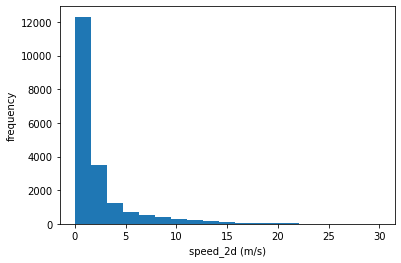

In [22]:
ix = birddata.bird_name == 'Eric'
speed = birddata.speed_2d[ix]       #speed data has some non numeric values
ind = np.isnan(speed)               #this will give true on non numeric values
plt.xlabel('speed_2d (m/s)')
plt.ylabel('frequency')
plt.hist(speed[~ind], bins = np.linspace(0,30,20))    #so to get only numeric value we use bitwise not(~)
plt.savefig('speed_2d_Eric.pdf')

Now we are calculating elapsed time or time stamp for each position of Eric

In [23]:
time_stamp = []

for k in birddata.date_time:
    time_stamp.append(datetime.datetime.strptime(k[:-3], "%Y-%m-%d %H:%M:%S"))
birddata['time_stamp'] = pd.Series(time_stamp)

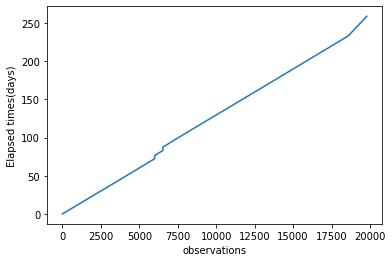

In [24]:
idx = birddata.bird_name == 'Eric'
times = birddata.time_stamp[idx]
elapsed_time = [time - times[0] for time in times]
plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1))
plt.xlabel('observations')
plt.ylabel('Elapsed times(days)')
plt.savefig('elapsed_time_Eric.pdf')

Now we'll find daily mean speed for Eric i.e. a graph of mean speeds of days vs days

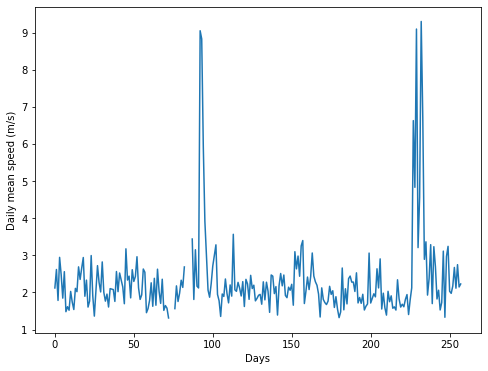

In [25]:
elapsed_days = np.array(elapsed_time)/datetime.timedelta(days=1)

next_day = 1
idx =[]
daily_mean_speed =[]
for i,t in enumerate(elapsed_days):
    if t<next_day:
        idx.append(i)
    else:
        daily_mean_speed.append(np.mean(birddata.speed_2d[idx]))
        next_day+=1
        idx=[]        
plt.figure(figsize= (8,6))
plt.plot(daily_mean_speed)
plt.xlabel('Days')
plt.ylabel('Daily mean speed (m/s)')
plt.savefig('daily_mean_speed.pdf')